## Equipo Cajathon - Universidad de Valencia.
 **- Autores.<br>**
     **Mikel Ardanaz.<br>**
     **María Bellver.<br>**
     **Alejandro Sanz.<br>**

## Índice
**0- Carga de librerías y datos.<br>**


**1- Análisis exploratorio de datos.<br>**


**2- Definición de funciones.<br>**


**3- Aplicación de los modelos para los conjuntos de datos.<br>**

**&nbsp;&nbsp; 3.1- Conjunto de datos de modelar. <br>**
**&nbsp;&nbsp; 3.2- Conjunto de datos de estimar..<br>**



## 0.Carga de librerías y datos

Cargamos las librerías que nos harán falta a lo largo del trabajo, tanto para el tratamiento de los datos, así como para la creación de los modelos de predicción.


In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import os#Llamada al sistema (ls)
import re #Expresiones Regulares
import matplotlib.pyplot as plt
from statistics import mode
import seaborn as sns

#Librerías para modelos machine learning
from scipy.stats import mode
from sklearn.linear_model import HuberRegressor,RANSACRegressor,TheilSenRegressor,Lasso,BayesianRidge,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import xgboost as xgb

#Creamos una función para poder mostrar varias tablas juntas.
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
#Para poder mostrar todos los datos de los conjuntos de datos que tratamos.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Cargamos los datos:
DirImagenes='imagenes_inmuebles_haya' #Directorio en el que se encuentra la carpeta con las imagenes
dataset=pd.read_csv('Modelar_UH2019.txt', sep='|', na_values='')
test=pd.read_csv('Estimar_UH2019.txt', sep='|', na_values='')

## 1.Análisis exploratorio de datos

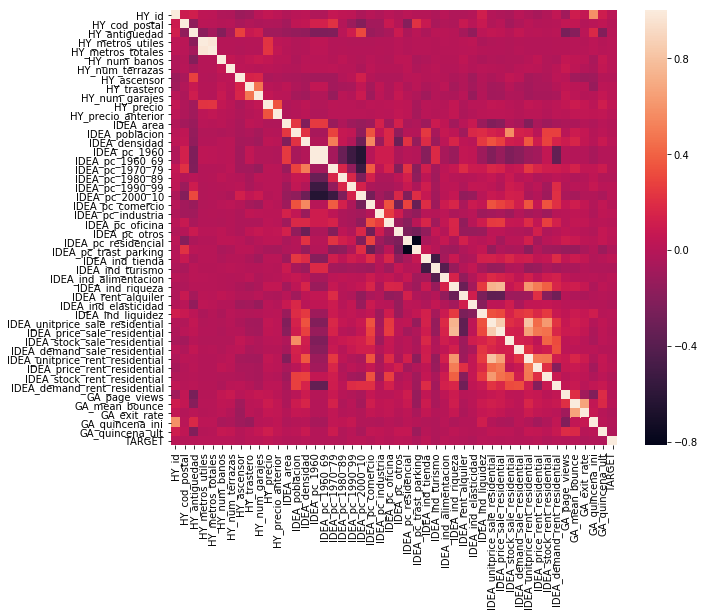

In [3]:
#Dibujamos la matriz de correlación entre variables:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)


De esta gráfica anterior podemos observar que tenemos:

 -Correlación positiva cercana a 1 entre: IDEA_pc_1960 y IDEA_pc_1960_69, así como entre GA_mean_bounce 
  y GA_exit rate.
          
 -Correlación negativa y cercana a 1 entre: IDEA_pc_2000_10 y las variables IDEA_pc_1960 ,IDEA_pc_1960_69,
   IDEA_pc_1970_79, IDEA_pc_1980_89, IDEA_pc_1990_99. Así como entre IDEA_pc_otro y IDEA_pc_residencial.

In [4]:
#Miramos el numero de registros por columnas que contienen NA, para el conjunto de datos modelar:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


#Miramos el numero de registros por columnas que contienen NA:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])

print('         Para conjunto modelar','          ',' Para el conjunto estimar')
display_side_by_side(missing_data,missing_data_test)

         Para conjunto modelar             Para el conjunto estimar


,Total,Percent
HY_cert_energ,8300,0.833501
HY_distribucion,6745,0.677345
HY_antiguedad,5484,0.550713
IDEA_ind_elasticidad,5106,0.512754
IDEA_ind_liquidez,5106,0.512754
HY_descripcion,3942,0.395863
HY_precio_anterior,3158,0.317132
IDEA_rent_alquiler,3062,0.307491
IDEA_unitprice_rent_residential,2998,0.301064
IDEA_price_rent_residential,2998,0.301064


Se puede observar que el conjunto de modelar tiene diversas variables con una grán cantidad de datos faltantes por encima del 20% del total de datos de conjunto. Por lo tanto será necesario considerar que variables podemos eliminar de nuestro conjunto, ya que se busca reducir la dimensionalidad del problema al máximo para conseguir un mejor modelo predictivo.

Por lo tanto vamos a eliminar todas las variables que tienen un numero de datos faltantes por encima del 20 %, lo que implica que todas las variables que comienzan por el nombre IDEA, serán elimandas, así como las variables HY_precio_anterior, HY_cod_postal, HY_cert_energ, HY_distribucion, HY_antiguedad, HY_descripcion, HY_metros_utiles, HY_provincia, GA_quincena_ini, GA_quincena_ult. Se crearán 4 variables nuevas donde que serán el conteo de la longitud de caracteres en las descripciones, el número de fotos asociadas al inmueble, la diferencia entre las quincenas( para saber cuantas quincenas ha estado el anuncio colgado) y la diferencia de precios (en el caso que se haya dado una rebaja).
De la misma forma se va a imputar la variable HY_metros_totales para el conjunto de modelar y estimar.

In [5]:
#Realizamos una limpieza del dataset, elimando aquellas variables que contenian una cantidad de NaN, por encima del 30%
dataset['dif']=dataset.HY_precio_anterior-dataset.HY_precio
test['dif'] = test.HY_precio_anterior - test.HY_precio

dataset['dif_quinc']=dataset.GA_quincena_ult-dataset.GA_quincena_ini
test['dif_quinc'] = test.GA_quincena_ult - test.GA_quincena_ini

dataset.dif=dataset.dif.fillna(0)
test.dif=test.dif.fillna(0)

dataset['texto'] = dataset.HY_distribucion.str.len().fillna(0) + dataset.HY_descripcion.str.len().fillna(0)
test['texto'] = test.HY_distribucion.str.len().fillna(0) + test.HY_descripcion.str.len().fillna(0)

imagenes=os.listdir(DirImagenes)
idsfotos=[re.sub('_.*','',i)for i in imagenes]
dfotos=pd.DataFrame(idsfotos,columns=['HY_id'])
dfotos.HY_id=dfotos.HY_id.astype(int)
dfotos=dfotos.groupby(['HY_id']).size().reset_index(name='numerofotos')

df3 = pd.merge(dataset, dfotos, on = 'HY_id',how='left')
df4 = pd.merge(test, dfotos, on = 'HY_id',how='left')

df3.numerofotos=df3.numerofotos.fillna(0)
df4.numerofotos=df4.numerofotos.fillna(0)

data_limpiando=df3.drop(df3.iloc[:,17:47],axis=1)
data_limpiando=data_limpiando.drop(['HY_precio_anterior','HY_cod_postal','HY_cert_energ','HY_distribucion','HY_antiguedad','HY_descripcion','HY_metros_utiles','HY_provincia','GA_quincena_ini','GA_quincena_ult'],axis=1)
#data_limpiando=df3.drop(['HY_id','HY_cod_postal'],axis=1)

test_limpiando=df4.drop(df4.iloc[:,17:47],axis=1)
test_limpiando=test_limpiando.drop(['HY_precio_anterior','HY_cod_postal','HY_cert_energ','HY_distribucion','HY_antiguedad','HY_descripcion','HY_metros_utiles','HY_provincia','GA_quincena_ini','GA_quincena_ult'],axis=1)

data_limpiando=data_limpiando.drop(data_limpiando[data_limpiando.HY_precio==0].index)

data_limpiando=data_limpiando.drop(data_limpiando[data_limpiando.HY_num_banos>10].index)
data_limpiando=data_limpiando.drop(data_limpiando[data_limpiando.HY_precio>4000000].index)
data_limpiando=data_limpiando.drop(data_limpiando[((data_limpiando.HY_metros_totales==99)|(data_limpiando.HY_metros_totales==9999))&((data_limpiando.HY_tipo=='Garaje')|(data_limpiando.HY_tipo=='Aparcamiento'))].index)

#Imputamos los valores de Hy_metros_totales


imp_median=SimpleImputer(missing_values=np.nan,strategy='median')
met=np.array(data_limpiando.HY_metros_totales)
reshmet=met.reshape(9,1098)
impute=imp_median.fit_transform(reshmet)
data_limpiando.HY_metros_totales=impute.flatten()

#imputamos los valores del test de metros totales
met=np.array(test_limpiando.HY_metros_totales)
reshmet=met.reshape(3,368)
impute=imp_median.fit_transform(reshmet)
test_limpiando.HY_metros_totales=impute.flatten()

In [6]:
# Comprobamos que el dataset con los datos limpios no contenga ningun tipo de valor NA,para el conjunto de modelar.
total = data_limpiando.isnull().sum().sort_values(ascending=False)
percent = (data_limpiando.isnull().sum()/data_limpiando.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


# Comprobamos que el dataset con los datos limpios no contenga ningun tipo de valor NA,para el conjunto de estimar.
total = test_limpiando.isnull().sum().sort_values(ascending=False)
percent = (test_limpiando.isnull().sum()/test_limpiando.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])



print(' Para conjunto modelar','  ',' Para el conjunto estimar')
display_side_by_side(missing_data,missing_data_test)


 Para conjunto modelar     Para el conjunto estimar


,Total,Percent
numerofotos,0,0.0
HY_num_garajes,0,0.0
HY_tipo,0,0.0
HY_metros_totales,0,0.0
HY_num_banos,0,0.0
HY_num_terrazas,0,0.0
HY_ascensor,0,0.0
HY_trastero,0,0.0
HY_precio,0,0.0
texto,0,0.0


Observamos ahora que ya no tenemos datos faltantes en nuestros conjuntos de datos y hemos eliminado las variables que no nos parecían adecuadas para el problema a tratar.

Realizamos un Boxplot de las variables que hemos decidido mantener tras el preprocesado de los datos y obsvamos que prácticamente en la mayoria de las variables observamos datos outliers.

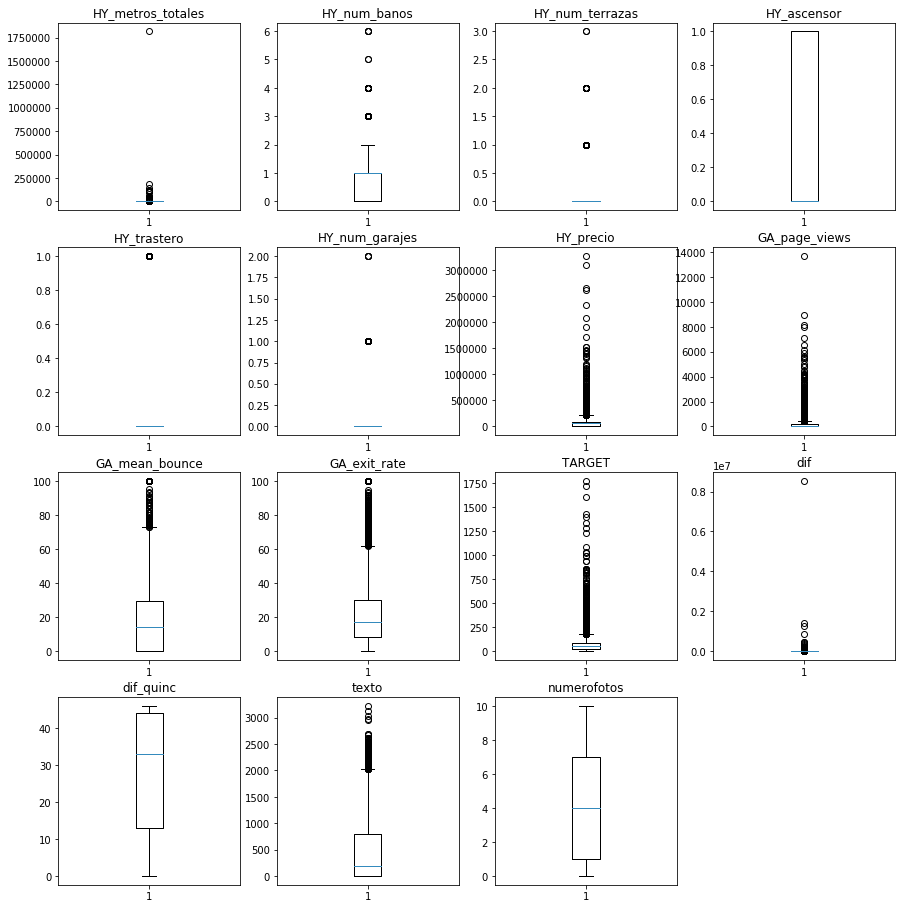

In [7]:
data_limpiando_plot=data_limpiando.drop(['HY_id','HY_tipo'],axis=1)
plt.figure(figsize=(15,20))
for idx, value in enumerate(data_limpiando_plot.columns):
    plt.subplot(5,4,idx+1)
    plt.title(value)
    plt.boxplot(data_limpiando_plot[value])
plt.style.use('ggplot')

Vemos que si seleccionamos los registros en los cuales el GA_exit_rate= 100 los valores asociados a la TARGET son nulos.

In [8]:
data_limpiando.TARGET[(data_limpiando.GA_exit_rate==100)].unique()

array([0.])

Podemos ver esto en la siguente "nube de puntos":

Text(0, 0.5, 'TARGET')

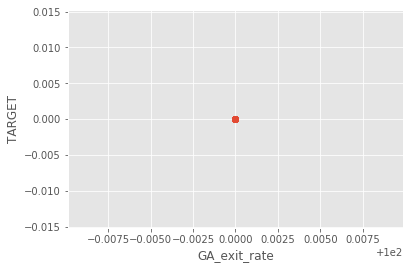

In [9]:
null=data_limpiando[(data_limpiando.GA_exit_rate==100)]
plt.scatter(null.GA_exit_rate,null.TARGET)
plt.xlabel("GA_exit_rate")
plt.ylabel("TARGET")

Vamos ahora a ver el número de inmubles de cada tipo que hay en el conjunto de datos de modelar.

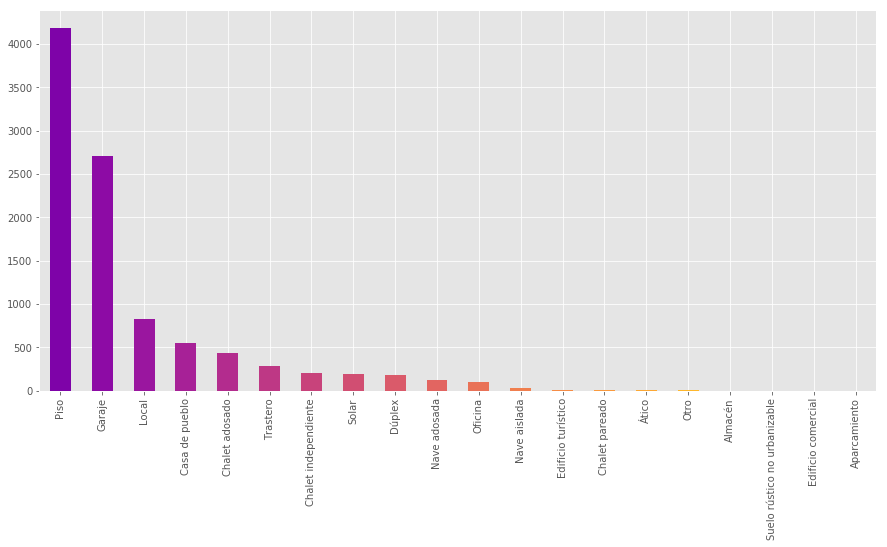

In [10]:
colors = plt.cm.plasma(np.linspace(0.25, 1, 20))
fig = plt.figure(figsize=(15,7))
bar_width = 0.05
data_limpiando.HY_tipo.value_counts().plot.bar(color=colors)
plt.style.use('ggplot')

## 2.Definición de funciones

Definimos la funciones que emplearemos para obtener el modelo de prediccion para los datos del conjunto modelar y posteriormente para los del conjunto estimar.
Para ello hemos haremos uso de un método ensamble, concretamente un stacked generalization, para ello emplearemos como predictor base un Bagging con estimador base RANSACRegressor y un predictor base RANSACRegressor con estimador base un RandomForest, se emplea el método RANSACRegressor, debido a que nuestos conjuntos de datos contiene valores atípicos y esto afectará a la calidad de nuestro modelo si no es tomado en cuenta. Para el segundo emplearemos para el metapredictor una SVR

In [11]:
def staked(X_train, Y_train, X_test, Y_test):
        ransac=RANSACRegressor(base_estimator=RandomForestRegressor(max_depth=12, n_estimators=10, n_jobs=-1,random_state=42),random_state=42)
        np.random.seed(42)
        clev1 = [BaggingRegressor(base_estimator=ransac,n_jobs=-1,random_state=42),ransac]
        
        ##Train level 1
        ## Use KFold to create a kfold object, then use kf.split to
        ## generate the indexes for the train and test sets. Then train
        ## - Train level 1 models using the kfold training sets.
        ## - Predict on kfold test sets for the next level 2 models.
        ## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
        kf=KFold(n_splits=len(clev1), shuffle=True)
        n=0
        #
        xlev2=np.zeros((len(Y_train),len(clev1)))
        for train_index, test_index in kf.split(X_train):

            clev1[n].fit(X_train.iloc[train_index, :], Y_train.iloc[train_index])
            xlev2[test_index, n]=clev1[n].predict(X_train.iloc[test_index, :])
            n=n+1

        ## Train level 2
        clev2 =SVR(kernel='rbf',gamma='auto')
        clev2.fit(xlev2,  Y_train)

        ## Re-train all level 1 classifiers using all training samples Xtr, ytr
        for c in clev1:
            c.fit(X_train, Y_train)
        ## Testing on Xts
        ## 1. Make the predictions using level 1 models
        ##    For information, report results for each model
        Xt2=np.zeros((len(Y_test),len(clev1)))
        for n,c in enumerate(clev1):
            Xt2[:,n]=c.predict(X_test)
            
        ## Compare this against using majority vote to aggregate results:
        ## Tip: use the scipy.stats.mode method

        ym=mode(Xt2,1).mode
        return ym

Debido a que el conjunto de estimar es ligeramente diferente al conjunto de modelar, hemos modificado la definicón anterior, para permitir el correcto funcionamiento.

In [12]:
def staked_est(X_train, Y_train, X_test):
        ransac=RANSACRegressor(base_estimator=RandomForestRegressor(max_depth=12, n_estimators=10, n_jobs=-1,random_state=42),random_state=42)
        np.random.seed(42)
        clev1 = [RandomForestRegressor(max_depth=12, n_estimators=10, n_jobs=-1,random_state=42),ransac]
        ##Train level 1
        ## Use KFold to create a kfold object, then use kf.split to
        ## generate the indexes for the train and test sets. Then train
        ## - Train level 1 models using the kfold training sets.
        ## - Predict on kfold test sets for the next level 2 models.
        ## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
        kf=KFold(n_splits=len(clev1), shuffle=True)
        n=0
        #
        xlev2=np.zeros((len(Y_train),len(clev1)))
        for train_index, test_index in kf.split(X_train):

            clev1[n].fit(X_train.iloc[train_index, :], Y_train.iloc[train_index])
            xlev2[test_index, n]=clev1[n].predict(X_train.iloc[test_index, :])
            n=n+1

        ## Train level 2
        clev2 =SVR(kernel='rbf',gamma='auto')
        # or clev2 = SVR(kernel='rbf')
        clev2.fit(xlev2,  Y_train)

        ## Re-train all level 1 classifiers using all training samples Xtr, ytr
        for c in clev1:
            c.fit(X_train, Y_train)
        ## Testing on Xts
        ## 1. Make the predictions using level 1 models
        ##    For information, report results for each model
        Xt2=np.zeros((len(X_test),len(clev1)))
        for n,c in enumerate(clev1):
            Xt2[:,n]=c.predict(X_test)

        ## Compare this against using majority vote to aggregate results:
        ## Tip: use the scipy.stats.mode method

        ym=mode(Xt2,1).mode
        return  ym

Debido a que tenemos diferentes tipos de inmuebles, se ha considerado que resulta adecuado realizar una serie de agrupaciones, de forma que inmuebles que puedan resultar similares esten en el mismo grupo, con el fín de obtener mejores predicciones para los conjuntos de estimar y modelar.

In [13]:
subg1=['Piso','Dúplex','Edificio turístico','Ático']
subg2=[ 'Casa de pueblo' ,'Chalet adosado', 'Chalet independiente','Chalet pareado']
subg3=['Garaje', 'Trastero','Nave adosada', 'Nave aislada', 'Almacén','Aparcamiento']
subg4=['Local','Edificio comercial','Oficina']
subg5=['Solar','Suelo rústico no urbanizable','Otro']

tipos=(subg1,subg2,subg3,subg4,subg5)
drop1=['HY_tipo']
drop2=['HY_tipo']
drop3=['HY_tipo','HY_num_banos','HY_num_terrazas','HY_ascensor','HY_trastero','HY_num_garajes']
drop4=['HY_tipo']
drop5=['HY_tipo','HY_num_banos','HY_num_terrazas','HY_ascensor','HY_trastero','HY_num_garajes']
caidas=(drop1,drop2,drop3,drop4,drop5)


Creamos una función para separar el conjunto de datos original en uno nuevo donde estan los datos agrupados por las categorias creadas anteriormente.

In [14]:
def filtrado(data_limpiando,caidas,tipos):
    lista=[]
    data_0=data_limpiando[data_limpiando.GA_exit_rate==100]
    data_no0=data_limpiando[data_limpiando.GA_exit_rate!=100]
    for i in range(len(caidas)):
        data_tipo=data_no0[data_no0.HY_tipo.isin(tipos[i])]
        lista.append(data_tipo.drop(caidas[i],axis=1))
    return lista,data_0

## 3.Aplicación de los modelos para los conjuntos de datos.

Es de vital importancia destacar que debido a la creación de los 5 subconjuntos anteriores, el orden original de los datos ha sido modificado, no obstante se han tomado las precauciones pertinentes para asegurar que los datos estén correctamente asociados entre sí. Esto sera importante a la hora de obtener las predicciones del conjunto de estimar ya que tenemos que asociar la predicción al HY_id de dicho inmueble.

### 3.1-Conjunto de datos de modelar.

Aplicamos las definiciones que hemos creado anteriormente para el conjunto de datos de modelar, considerando que hemos realizado la división en las subcategorias indicadas anteriormente.

A la hora de obtener los valores predecidos para aquellos  valoros de HY_Exit_rate=100, no se va a realizar la predicción, a consecuencia de que en todos los casos el valor de la TARGET es cero.

In [15]:
datos_fil,data_0=filtrado(data_limpiando,caidas,tipos)
dic={'TARGET':data_0.TARGET,'PRED':np.zeros(len(data_0))}
dat_junt_mod=pd.DataFrame(dic)
for i in np.arange(len(datos_fil)):
    datos=datos_fil[i]
    datos_sin_t=datos.drop(['HY_id','TARGET'],axis=1)
    X_train, X_test, Y_train, Y_test= train_test_split(datos_sin_t, datos.TARGET,test_size=.33, random_state=42)
    pred=staked(X_train, Y_train, X_test,Y_test).flatten()
    dic={'TARGET': Y_test, 'PRED': pred}
    calc_error=pd.DataFrame(dic)
    dat_junt_mod=pd.concat([dat_junt_mod,calc_error])
print('El valor de el error absoluto de la mediana para los datos de target del conjunto de modelar y los valores predecidos por nuesto modelo es:' ,metrics.median_absolute_error(dat_junt_mod.TARGET,dat_junt_mod.PRED))

El valor de el error absoluto de la mediana para los datos de target del conjunto de modelar y los valores predecidos por nuesto modelo es: 15.811901764316843


Realizamos ahora un boxplot de los valores de TARGET que contiene  el conjunto de datos y los valores de las prediciones de TARGET, cabe destacar que los valores predecidos no parece contener valores que puedieran ser tomados como outliers, debido al uso del método RANSACRegressor.

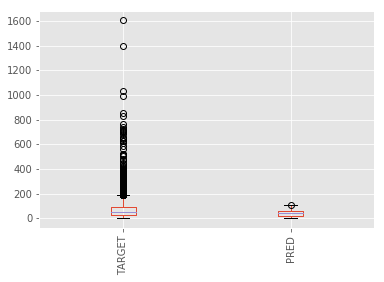

In [16]:
dat_junt_mod.boxplot(rot=90)

### 3.2-Conjunto de estimar.

Aplicamos las definiciones que hemos creado anteriormente para el conjunto de datos de estimar, considerando que hemos realizado la división en las subcategorias indicadas anteriormente.

In [17]:
dat_junt_est=pd.DataFrame()
datos_fil_est,_=filtrado(data_limpiando,caidas,tipos)
test_fil_est,estimar_0=filtrado(test_limpiando,caidas,tipos)
dic={'HY_id':estimar_0.HY_id,'PRED':np.zeros(len(estimar_0))}
dat_junt_est=pd.DataFrame(dic)
for i in np.arange(len(datos_fil)):
    datos=datos_fil_est[i]
    datos_sin_t=datos.drop(['HY_id','TARGET'],axis=1)
    test=test_fil_est[i]
    test_sin_t=test.drop(['HY_id'],axis=1)
    #X_train, X_test, Y_train, Y_test= train_test_split(datos_sin_t, datos.TARGET,test_size=.33, random_state=42)
    pred=staked_est(datos_sin_t, datos.TARGET, test_sin_t).flatten()
    dic={'HY_id': test.HY_id, 'PRED': pred}
    calc_error=pd.DataFrame(dic)
    dat_junt_est=pd.concat([dat_junt_est,calc_error])

In [18]:
dat_junt_est

,HY_id,PRED
45,6030501,0.000000
170,6035540,0.000000
320,6041705,0.000000
351,6043208,0.000000
489,6028717,0.000000
494,6030222,0.000000
520,6076014,0.000000
541,6077015,0.000000
596,6079654,0.000000
609,6079912,0.000000


In [20]:
dat_junt_est.to_csv('Cajathon.txt',sep='|',index=False)